# Testing python interface for Thorlabs APT
awojdyla@lbl.gov, Dec 2025

In [1]:
import pylablib

In [2]:
from pylablib.devices import Thorlabs

# List available APT devices
devices = Thorlabs.list_kinesis_devices()
print("Available devices:", devices)



Available devices: [('83815134', 'APT DC Motor Controller'), ('83829778', 'APT DC Motor Controller'), ('83812453', 'APT DC Motor Controller'), ('83813170', 'APT DC Motor Controller')]


In [3]:
# Connect to the motor (replace with your device serial number)
motor_x = Thorlabs.KinesisMotor('83829778')
motor_y = Thorlabs.KinesisMotor('83815134')
motor_z = Thorlabs.KinesisMotor('83812453')

In [4]:
motor_y.move_by(100)

## connect to camera

In [5]:
from pypylon import pylon

tl_factory = pylon.TlFactory.GetInstance()

# Create a device info object and set the IP address
device_info = pylon.DeviceInfo()
device_info.SetDeviceClass("BaslerGigE")  # Ensure we target GigE cameras
device_info.SetIpAddress("192.168.10.212")

# Try to create the camera object
camera = pylon.InstantCamera(tl_factory.CreateDevice(device_info))



In [6]:
camera.Open()
print(f"Connected to camera: {camera.GetDeviceInfo().GetModelName()}")

Connected to camera: a2A1920-51gcBAS


In [7]:
# Acquire one image from the camera
camera.StartGrabbingMax(1)
grab_result = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

if grab_result.GrabSucceeded():
    image = grab_result.Array
    print(f"Image acquired successfully. Shape: {image.shape}")
else:
    print("Image grab failed")

grab_result.Release()
camera.StopGrabbing()

Image acquired successfully. Shape: (1200, 1920)


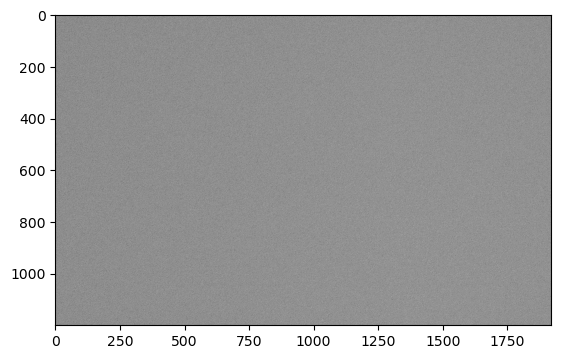

In [8]:
from matplotlib import pyplot as plt
plt.imshow(image, cmap='gray')
plt.show()